In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Healthcare-Diabetes.csv')

print("Назви колонок:")
print(df.columns.tolist())

print("\nРозмір датасета:")
print(df.shape)

Назви колонок:
['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Розмір датасета:
(2768, 10)


In [3]:
df = df.drop(columns=['Id'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns=["Outcome"])
Y = df['Outcome'] 

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

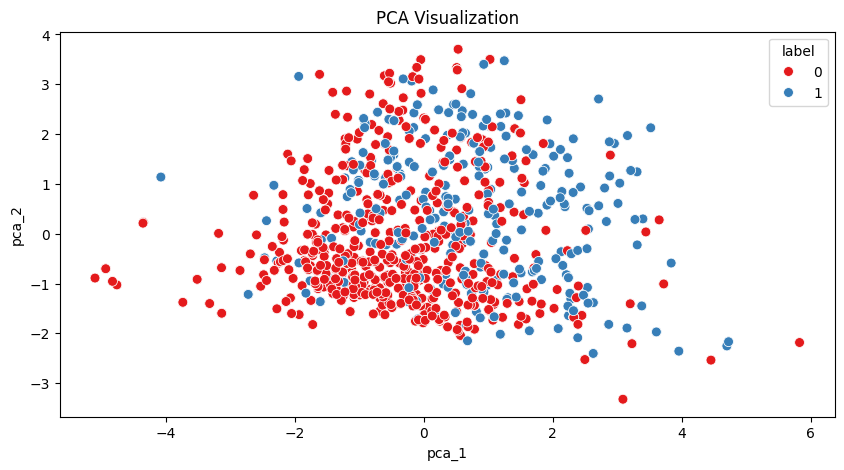

In [7]:
pca_df = pd.DataFrame({'pca_1': X_pca[:, 0], 'pca_2': X_pca[:, 1], 'label': Y})
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_df, x='pca_1', y='pca_2', hue='label', palette='Set1', s=50)
plt.title('PCA Visualization')
plt.show()

In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

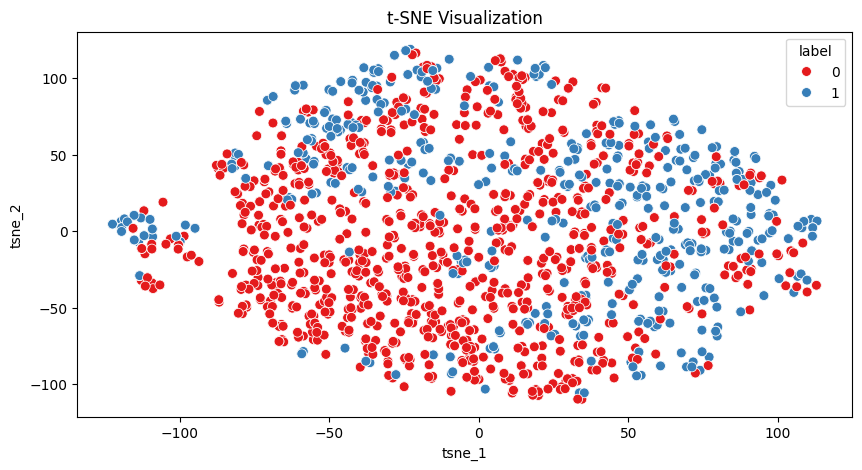

In [9]:
tsne_df = pd.DataFrame({'tsne_1': X_tsne[:, 0], 'tsne_2': X_tsne[:, 1], 'label': Y})
plt.figure(figsize=(10, 5))
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='label', palette='Set1', s=50)
plt.title('t-SNE Visualization')
plt.show()


In [10]:
from PIL import Image

image = Image.open('cat.jpg') 
image = np.array(image) / 255.0
h, w, c = image.shape

In [11]:
pixels = image.reshape(-1, c)

levels = [64, 32, 16, 8]

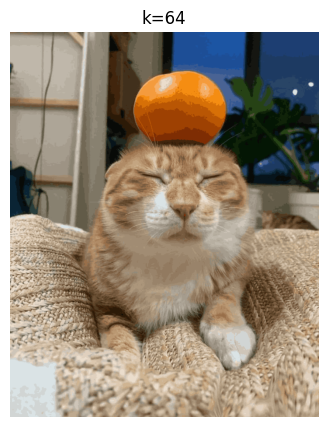

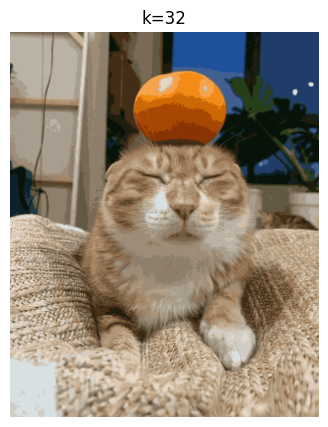

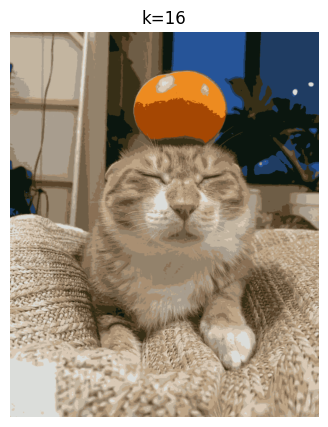

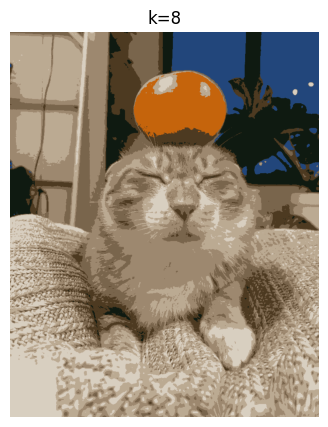

In [ ]:
for level in levels:
    kmeans = KMeans(n_clusters=level, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.predict(pixels)
    quantized_pixels = kmeans.cluster_centers_[labels]
    quantized_image = quantized_pixels.reshape(h, w, c)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(quantized_image)
    plt.title(f'k={level}')
    plt.axis('off')
    plt.show()

https://www.kaggle.com/code/ahmedgmy/bbc-articles/

In [13]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()


,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [14]:
print(df.isnull().sum())

print(df['labels'].value_counts())

text      0
labels    0
dtype: int64
labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [ ]:
import re
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk


nltk_data_path = os.path.expanduser("~/nltk_data")
if nltk_data_path not in nltk.data.path:
    nltk.data.path.append(nltk_data_path)


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /home/perry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/perry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/perry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) 
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Лемматизация и удаление стоп-слов
    return ' '.join(tokens)

In [17]:
df['processed_text'] = df['text'].apply(preprocess_text)
print(df.head())

                                                text    labels  \
0  Ad sales boost Time Warner profit\n\nQuarterly...  business   
1  Dollar gains on Greenspan speech\n\nThe dollar...  business   
2  Yukos unit buyer faces loan claim\n\nThe owner...  business   
3  High fuel prices hit BA's profits\n\nBritish A...  business   
4  Pernod takeover talk lifts Domecq\n\nShares in...  business   

                                      processed_text  
0  ad sale boost time warner profit quarterly pro...  
1  dollar gain greenspan speech dollar hit highes...  
2  yukos unit buyer face loan claim owner embattl...  
3  high fuel price hit ba profit british airway b...  
4  pernod takeover talk lift domecq share uk drin...  


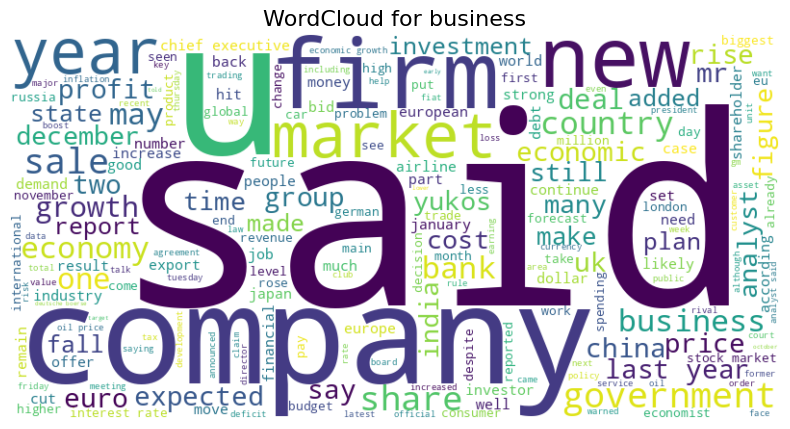

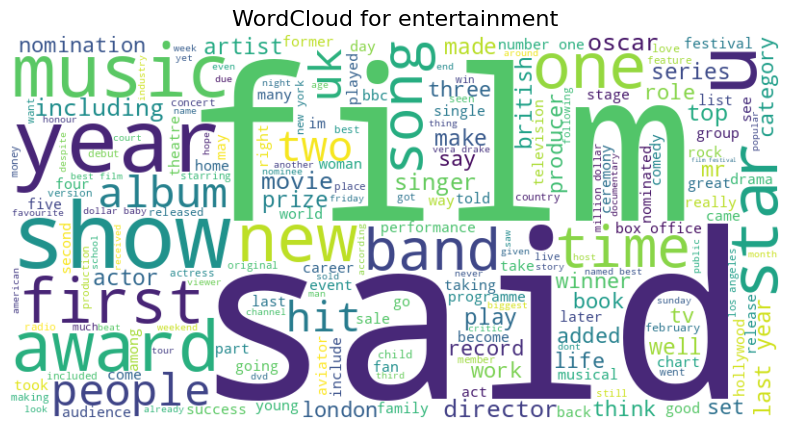

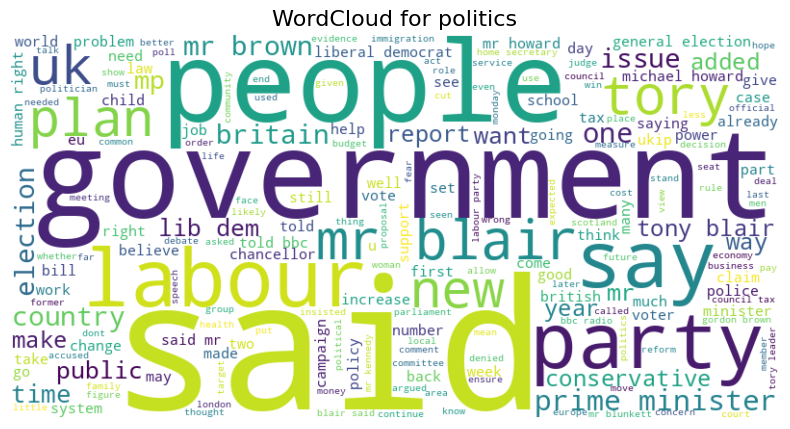

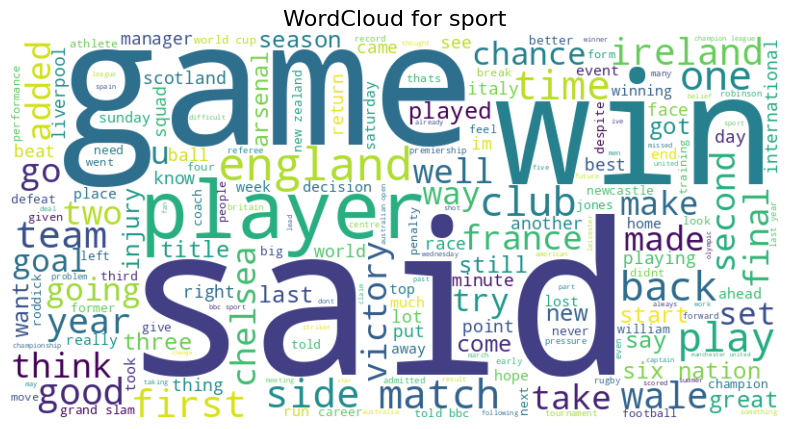

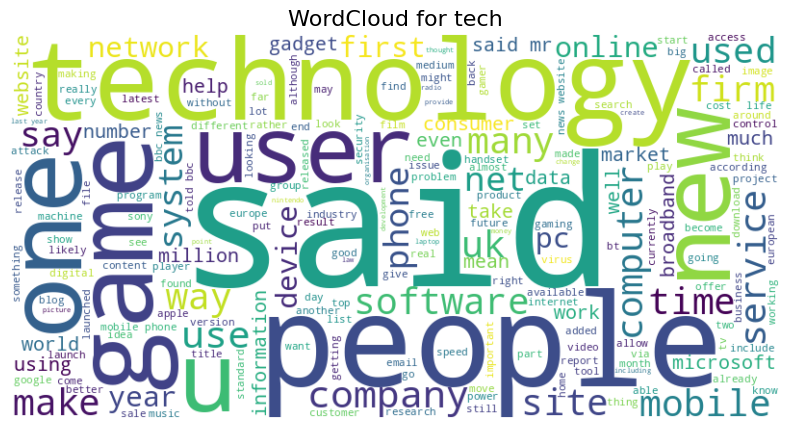

In [18]:
from wordcloud import WordCloud


def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


for label in df['labels'].unique():
    plot_wordcloud(df[df['labels'] == label]['processed_text'], f"WordCloud for {label}")


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


vectorizer = TfidfVectorizer(max_features=4000)
encoder = LabelEncoder()

X = vectorizer.fit_transform(df['processed_text'])
y = encoder.fit_transform(df['labels'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.9707865168539326
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       115
           1       0.99      0.94      0.96        72
           2       0.94      0.97      0.95        76
           3       1.00      0.99      1.00       102
           4       0.95      0.99      0.97        80

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

